# Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 학습 및 제출용 데이터 경로 (로컬 저장소 기준)
# - 같은 폴더 내 `data` 디렉토리의 CSV 파일을 사용하도록 수정
# - 상대 경로를 사용해서 다른 환경(로컬/다른 PC)에서도 동일하게 동작
DATA_DIR = 'data'

# Load the training data (local files)
df_train = pd.read_csv(f'{DATA_DIR}/train.csv')  # 학습용 데이터
df_test = pd.read_csv(f'{DATA_DIR}/test.csv')    # 평가용 데이터
df_sub = pd.read_csv(f'{DATA_DIR}/sample_submission.csv')  # 제출 형식 예시

## (참고용) 캐글 환경에서 데이터 불러오기
#df_train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')
#df_test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')
#df_sub = pd.read_csv('/kaggle/input/playground-series-s6e1/sample_submission.csv')


# EDA

## 1. Dataset Overview

In [2]:
print("\n--- 1.1 First 5 Rows ---")
display(df_train.head())
display(df_test.head())

print("\n--- 1.2 Data Information (Types & Non-null) ---")
print(df_train.info())
print(df_test.info())

print("\n--- 1.3 Descriptive Statistics (Numerical) ---")
display(df_train.describe())
display(df_test.describe())

print("\n--- 1.4 Descriptive Statistics (Categorical) ---")
display(df_train.describe(include=['O']))
display(df_test.describe(include=['O']))


--- 1.1 First 5 Rows ---


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate



--- 1.2 Data Information (Types & Non-null) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


,id,age,study_hours,class_attendance,sleep_hours
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
mean,764999.500000,20.544137,4.003878,71.982509,7.072070
std,77942.430678,2.260452,2.357741,17.414695,1.745513
min,630000.000000,17.000000,0.080000,40.600000,4.100000
25%,697499.750000,19.000000,1.980000,57.000000,5.600000
50%,764999.500000,21.000000,4.010000,72.600000,7.100000
75%,832499.250000,23.000000,6.050000,87.200000,8.600000
max,899999.000000,24.000000,7.910000,99.400000,9.900000



--- 1.4 Descriptive Statistics (Categorical) ---


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,270000,270000,270000,270000,270000,270000,270000
unique,3,7,2,3,5,3,3
top,male,b.tech,yes,good,coaching,medium,moderate
freq,90682,56461,248671,91754,56698,91816,151656


## 2. Missing Values Analysis

In [3]:
print("\n--- 2.1 Missing Values Count & Percentage ---")
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percentage (%)', ascending=False)

if not missing_df.empty:
    display(missing_df)
    
    # Visualizing Missing Values
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_df.index, y=missing_df['Percentage (%)'])
    plt.xticks(rotation=45)
    plt.title('Missing Values Percentage by Feature')
    plt.show()
else:
    print("✅ No missing values found!")


--- 2.1 Missing Values Count & Percentage ---
✅ No missing values found!


## 3. Target Analysis


--- Analyzing Target Variable: exam_score ---


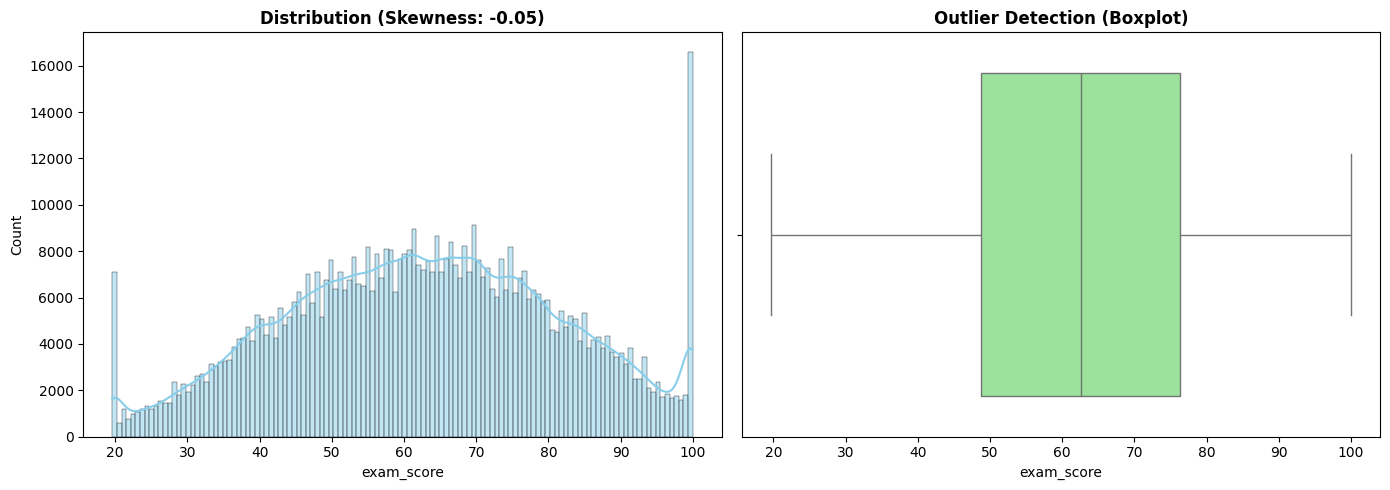

📌 Summary Statistics:
count    630000.000000
mean         62.506672
std          18.916884
min          19.599000
25%          48.800000
50%          62.600000
75%          76.300000
max         100.000000
Name: exam_score, dtype: float64


In [4]:
target_col = 'exam_score' 

if target_col in df_train.columns:
    print(f"\n--- Analyzing Target Variable: {target_col} ---")
    
    # ---------------------------------------------------------
    # CASE 1: Categorical (Classification) - Low cardinality
    # ---------------------------------------------------------
    if df_train[target_col].nunique() < 20:
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x=df_train[target_col], palette='viridis', order=df_train[target_col].value_counts().index)
        
        plt.title(f"Target Distribution (Categorical): {target_col}", fontsize=14, fontweight='bold')
        plt.xlabel(target_col, fontweight='bold')
        
        # Add count and percentage (%) annotations on top of bars
        total = len(df_train)
        for p in ax.patches:
            count = int(p.get_height())
            pct = f'{100 * count / total:.1f}%'
            ax.annotate(f'{count}\n({pct})', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')
        
        plt.show()

    # ---------------------------------------------------------
    # CASE 2: Numerical (Regression) - Continuous values
    # ---------------------------------------------------------
    else:
        # Plot two graphs side by side (Left: Histogram, Right: Boxplot)
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # [Left] Histogram (Check distribution shape)
        sns.histplot(df_train[target_col], kde=True, ax=axes[0], color='skyblue')
        skewness = df_train[target_col].skew() # Calculate skewness
        axes[0].set_title(f"Distribution (Skewness: {skewness:.2f})", fontweight='bold')
        
        # [Right] Boxplot (Check for outliers)
        sns.boxplot(x=df_train[target_col], ax=axes[1], color='lightgreen')
        axes[1].set_title("Outlier Detection (Boxplot)", fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Print Summary Statistics
        print(f"📌 Summary Statistics:\n{df_train[target_col].describe()}")

else:
    print(f"⚠️ Target column '{target_col}' not found. Please check the column name.")

## 4. Univariate Analysis (Feature Distribution)

In [5]:
# ------------------------------------------
# 4.1 Separate Numerical & Categorical Columns
# ------------------------------------------
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_train.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"numerical_columns: {len(num_cols)}")
print(f"categorical_columns: {len(cat_cols)}")
print(f"numerical_list: {num_cols}")
print(f"categorical_list: {cat_cols}")

numerical_columns: 6
categorical_columns: 7
numerical_list: ['id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
categorical_list: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']



--- Visualizing Numerical Distributions & Outliers ---


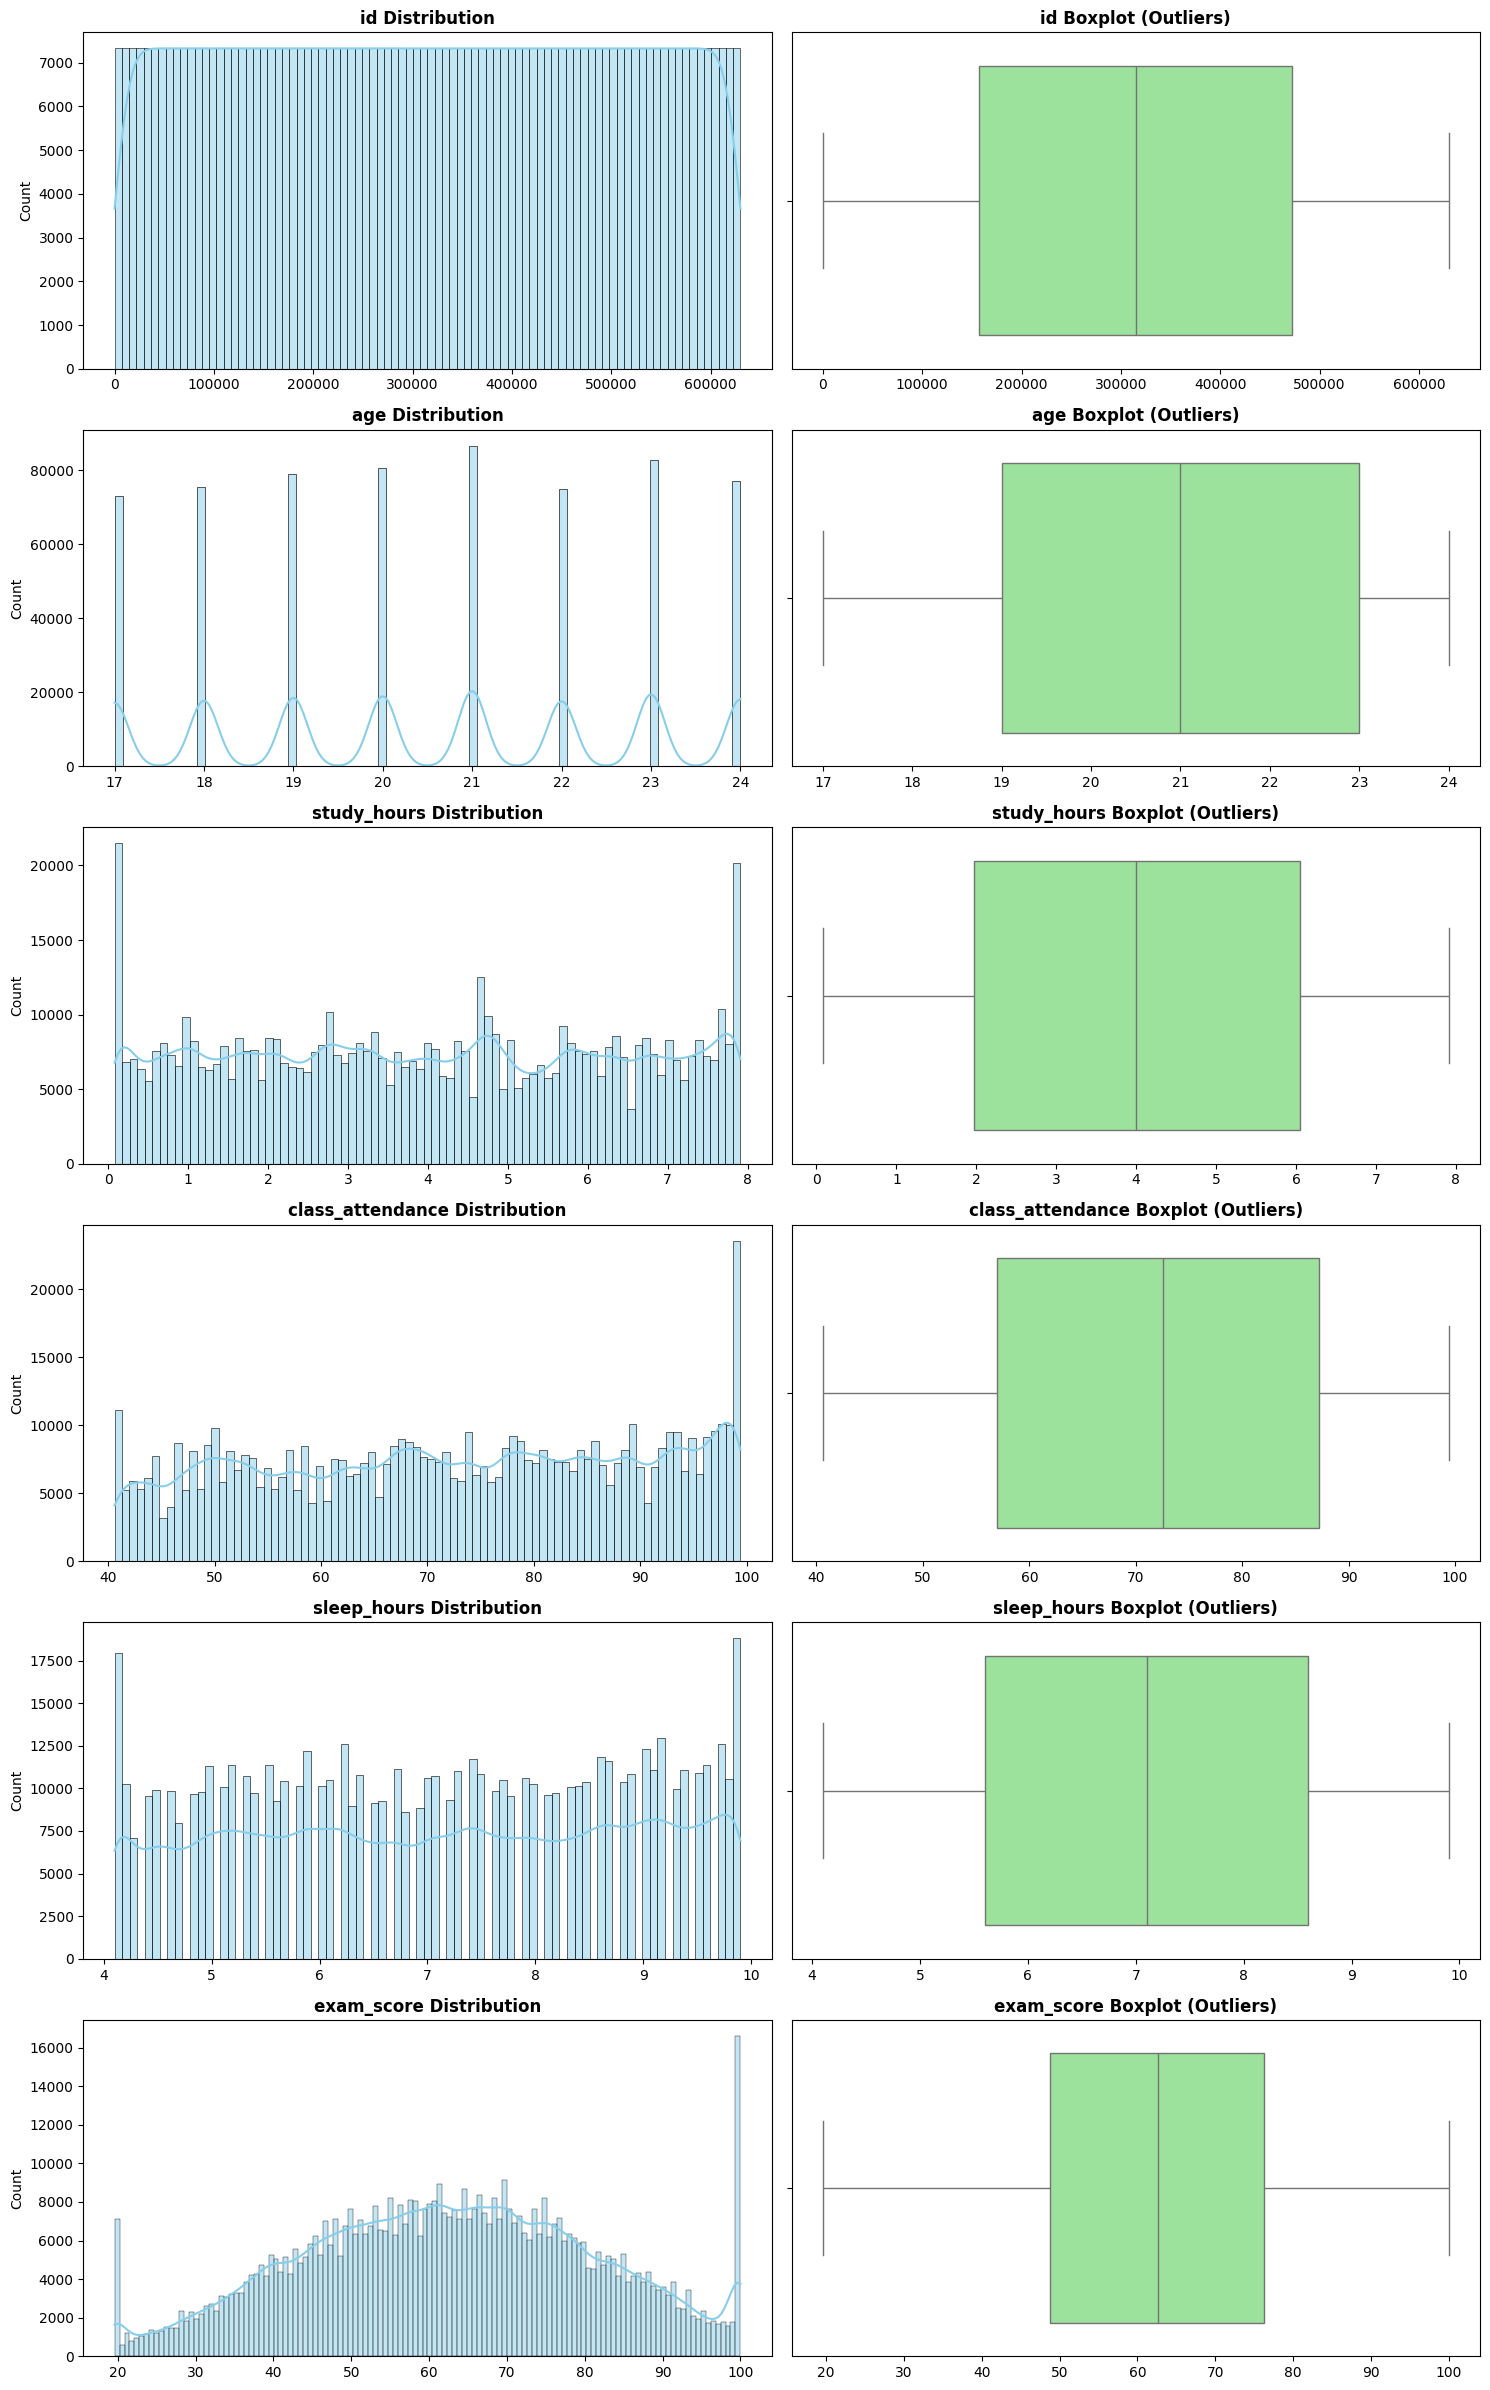

In [6]:
# ------------------------------------------
# 4.2 Numerical Variable Analysis
#     (Left: Distribution / Right: Outliers)
# ------------------------------------------
print("\n--- Visualizing Numerical Distributions & Outliers ---")

if len(num_cols) > 0:
    n_vars = len(num_cols)
    
    # Create subplots: Rows = number of variables, Cols = 2
    # Adjust height dynamically based on the number of variables
    fig, axes = plt.subplots(n_vars, 2, figsize=(15, n_vars * 4))
    
    # Handle the case where there is only 1 numerical variable (axes becomes 1D array)
    if n_vars == 1:
        axes = np.array([axes])
    
    for i, col in enumerate(num_cols):
        # [Left Column] Histogram (Distribution check)
        sns.histplot(df_train[col], kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
        axes[i, 0].set_title(f"{col} Distribution", fontweight='bold')
        axes[i, 0].set_xlabel('')
        
        # [Right Column] Boxplot (Outlier check)
        sns.boxplot(
        x=df_train[col], 
        ax=axes[i, 1], 
        color='lightgreen',
        flierprops={
            'marker': 'o',                # Shape: Circle
            'markerfacecolor': 'red',     # Color: Red
            'markersize': 4,              # Size
            'markeredgecolor': 'none',    # No border lines on dots
            'alpha': 0.7                  # Transparency
            }
        )
        axes[i, 1].set_title(f"{col} Boxplot (Outliers)", fontweight='bold')
        axes[i, 1].set_xlabel('')
        
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No numerical columns found to plot.")


--- Visualizing Categorical Distributions (Bar + Pie) ---


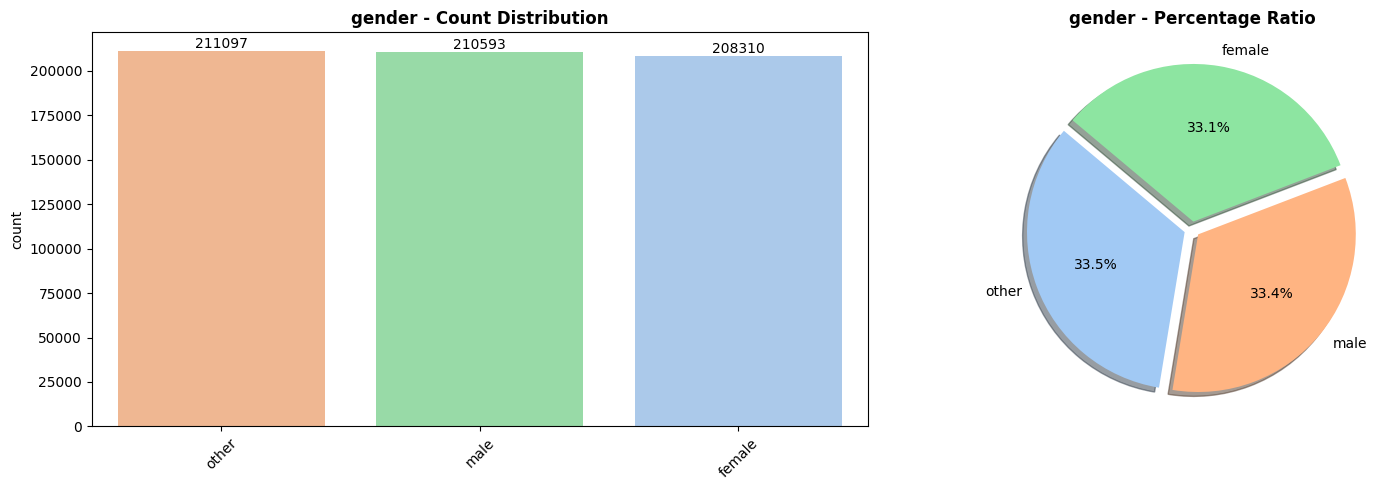

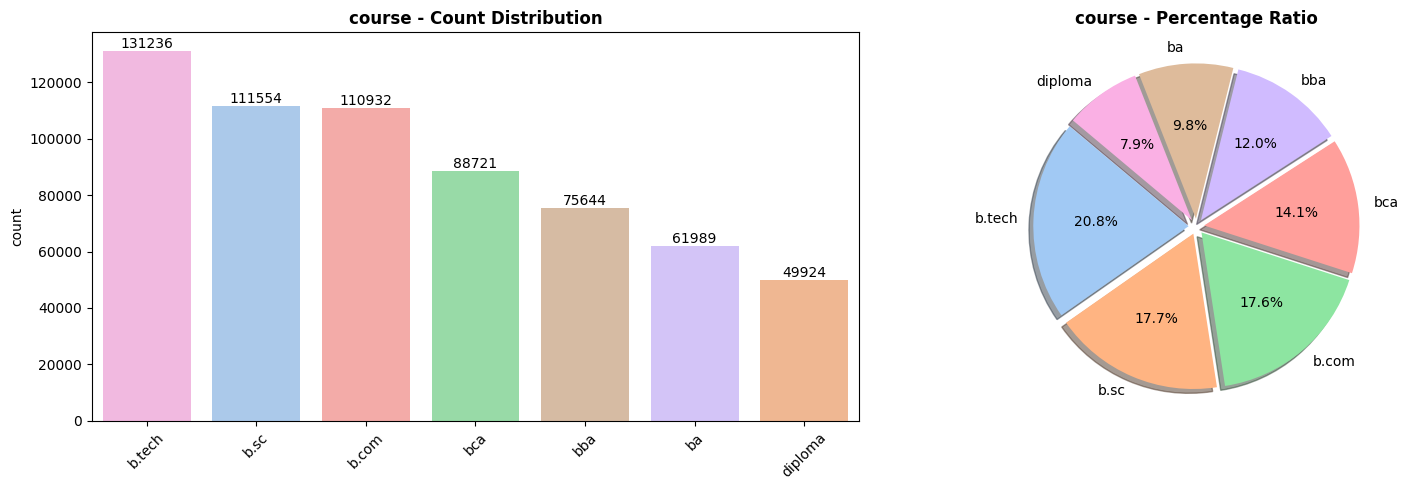

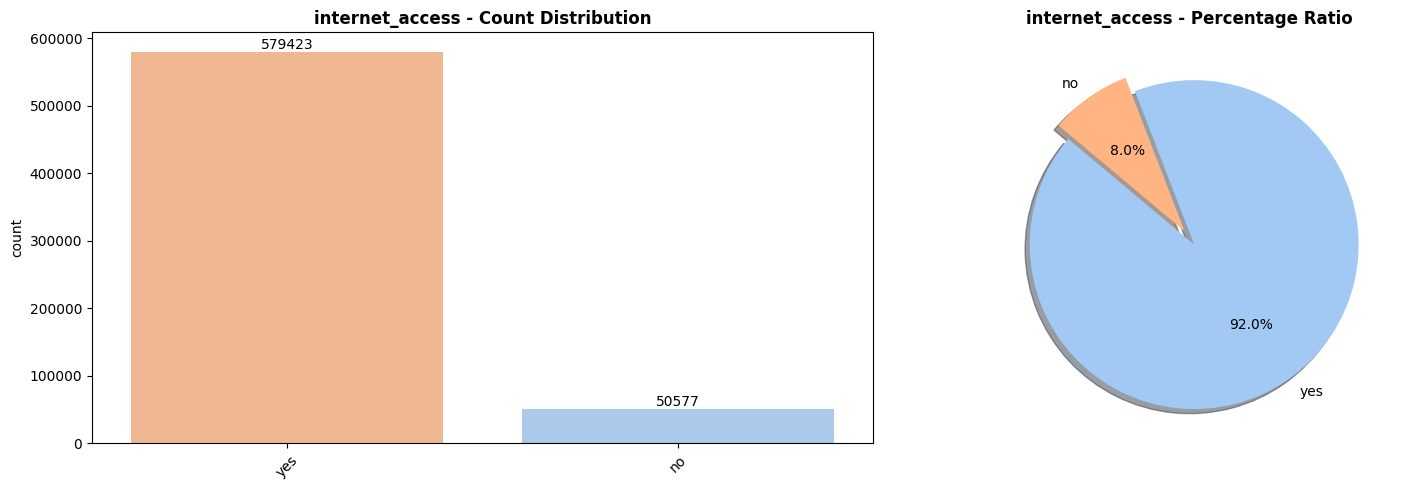

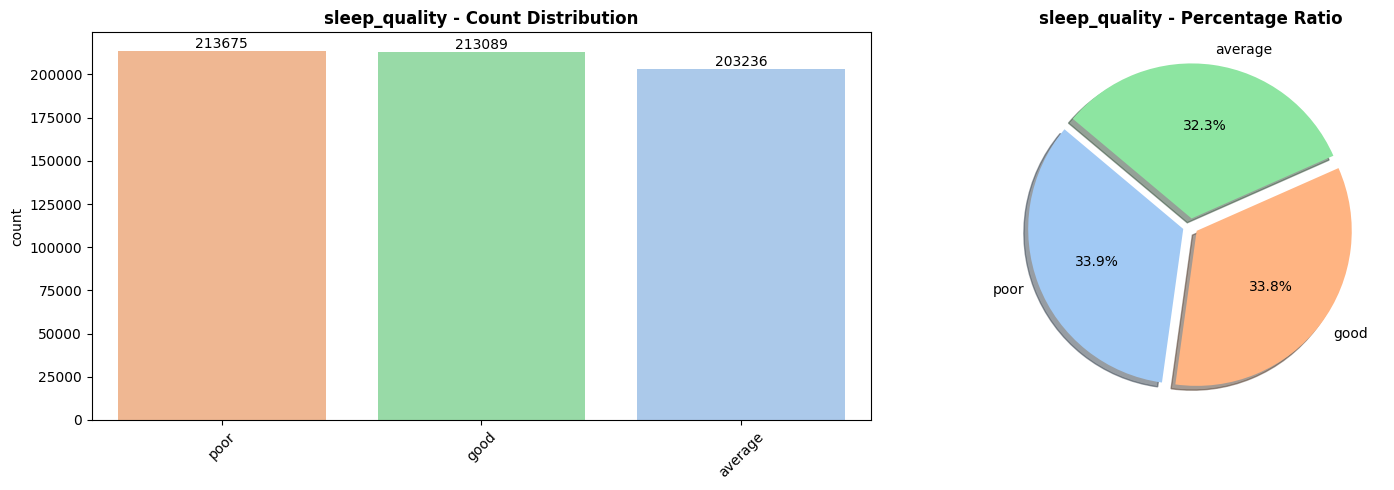

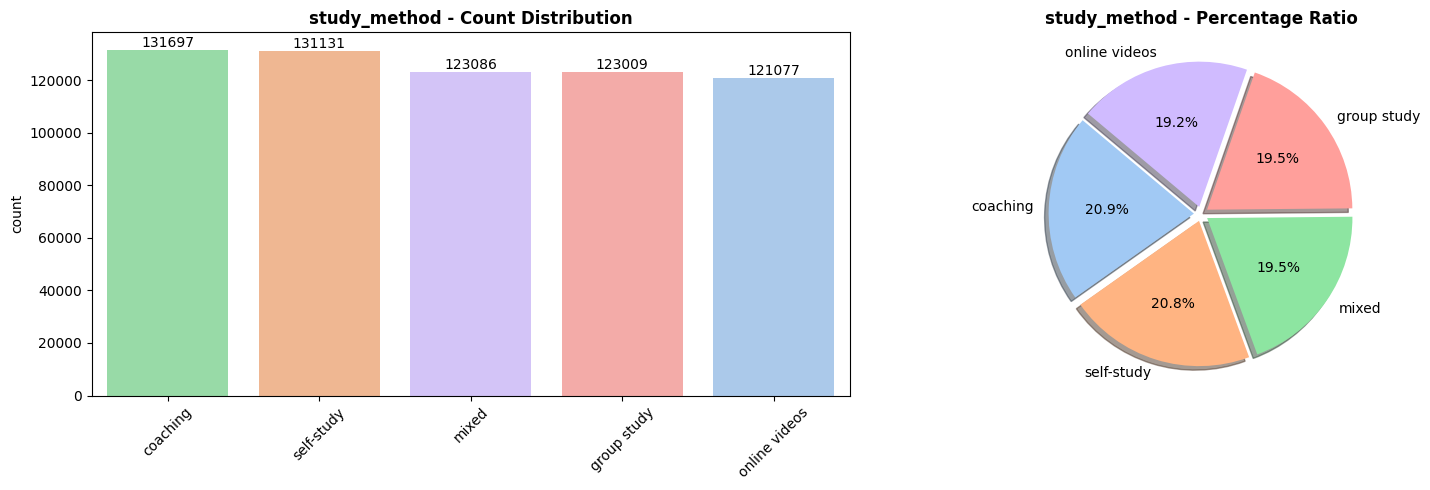

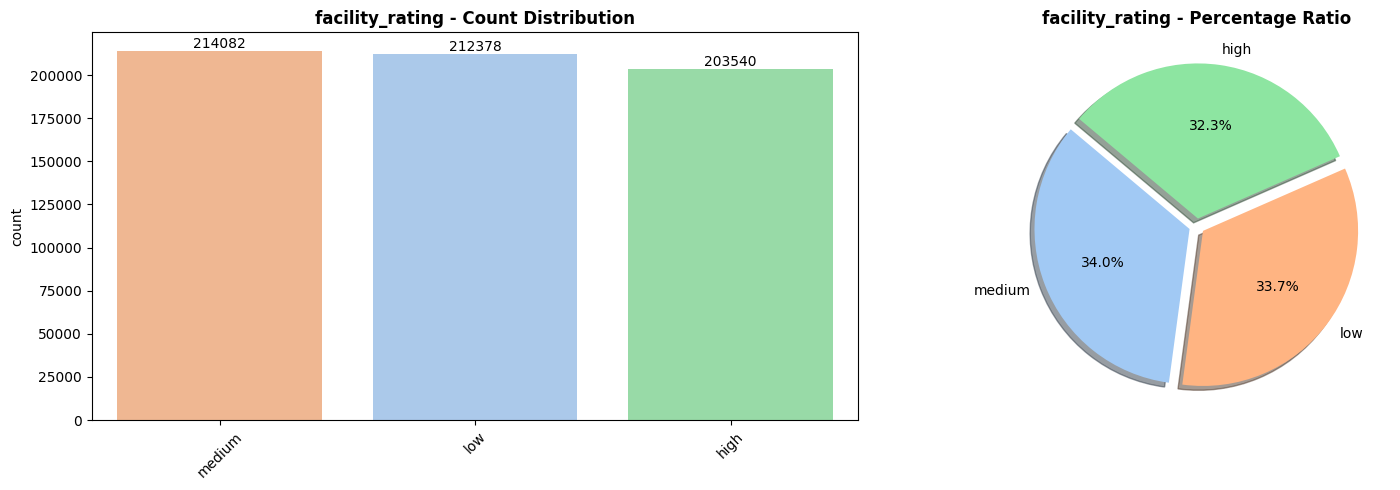

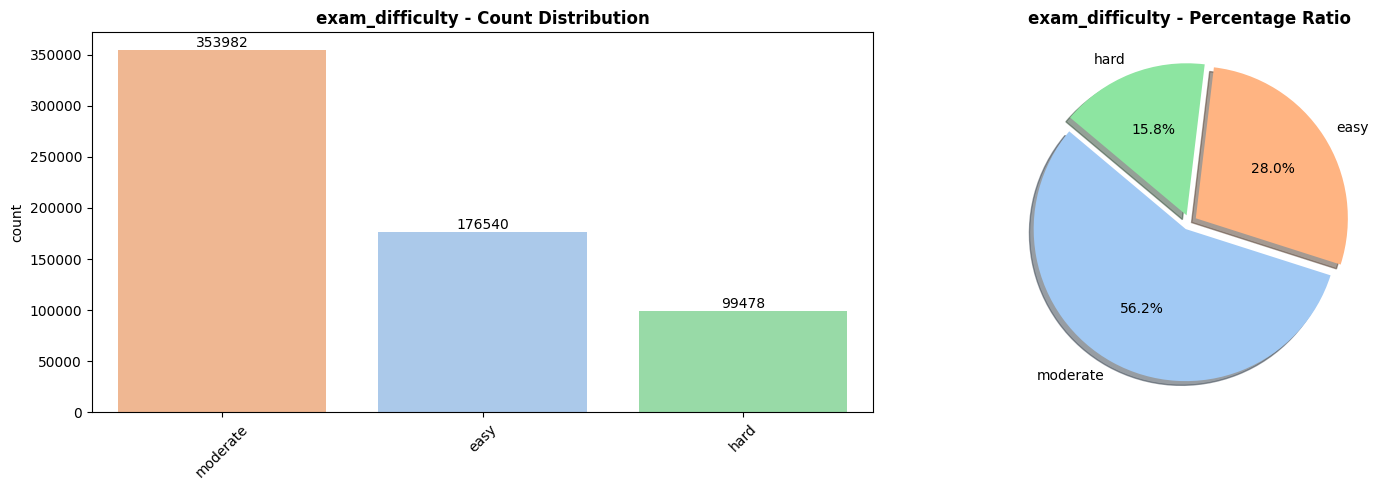

In [7]:
# ==========================================
# 4.3 Categorical Variable Analysis (Bar + Pie)
# ==========================================
print("\n--- Visualizing Categorical Distributions (Bar + Pie) ---")

if len(cat_cols) > 0:
    # Select columns with fewer than 20 unique values
    # (Pie charts become unreadable with too many categories)
    valid_cat_cols = [col for col in cat_cols if df_train[col].nunique() < 20]
    
    if len(valid_cat_cols) > 0:
        
        # Create a figure (row) for each variable
        for col in valid_cat_cols:
            fig, axes = plt.subplots(1, 2, figsize=(16, 5))
            
            # Aggregate data (for sorting order)
            val_counts = df_train[col].value_counts()
            
            # -------------------------------------------------------
            # [Left] Bar Chart (Count)
            # -------------------------------------------------------
            ax_bar = axes[0]
            sns.countplot(
                x=df_train[col], 
                hue=df_train[col],       # Assign x to hue to fix FutureWarning
                palette='pastel', 
                legend=False, 
                order=val_counts.index,  # Sort by frequency
                ax=ax_bar
            )
            ax_bar.set_title(f'{col} - Count Distribution', fontweight='bold')
            ax_bar.set_xlabel('')
            ax_bar.tick_params(axis='x', rotation=45) # Rotate labels if they are long
            
            # Add count annotations on top of bars
            for p in ax_bar.patches:
                height = int(p.get_height())
                ax_bar.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='bottom', fontsize=10, color='black')

            # -------------------------------------------------------
            # [Right] Pie Chart (Percentage)
            # -------------------------------------------------------
            ax_pie = axes[1]
            ax_pie.pie(
                val_counts, 
                labels=val_counts.index, 
                autopct='%1.1f%%', 
                startangle=140, 
                colors=sns.color_palette('pastel'), # Match colors with the bar chart
                shadow=True,
                explode=[0.05] * len(val_counts)    # Explode slices slightly for emphasis
            )
            ax_pie.set_title(f'{col} - Percentage Ratio', fontweight='bold')

            plt.tight_layout()
            plt.show()
            
    else:
        print("⚠️ Categorical columns have too many unique values (>20) to plot efficiently.")
else:
    print("⚠️ No categorical columns found.")

## 5. Correlation Analysis


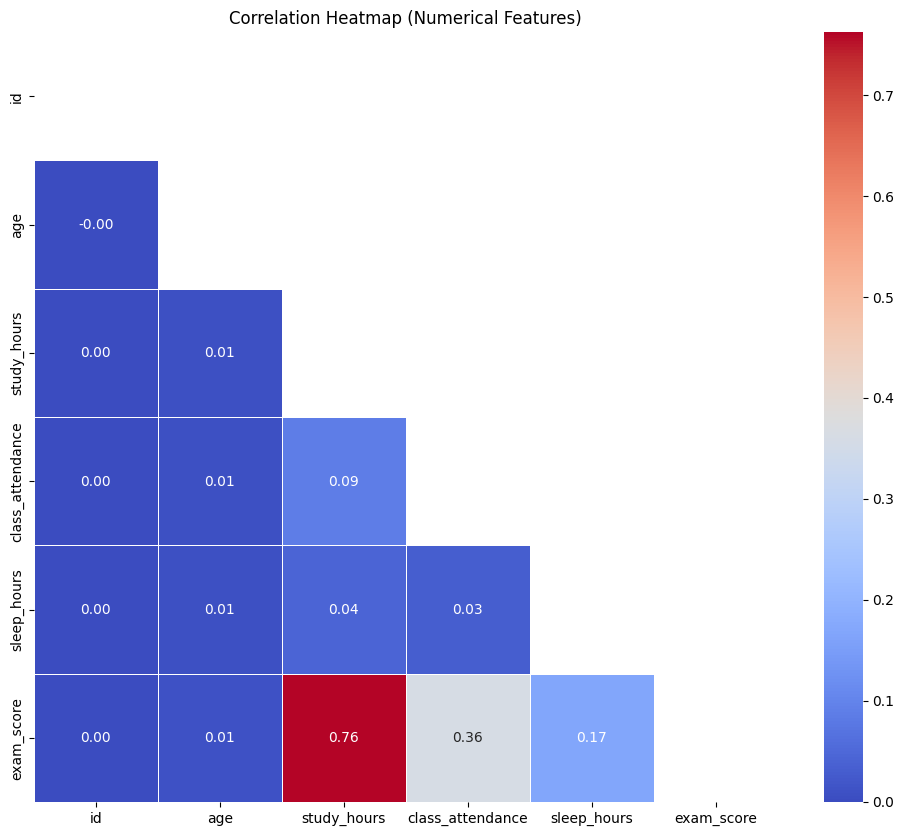

In [8]:
if len(num_cols) > 0:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_train[num_cols].corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Mask upper triangle
    
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5)
    plt.title('Correlation Heatmap (Numerical Features)')
    plt.show()

## 6. Features vs Target


--- 5. Numerical Features vs Target (Scatter Plot) ---


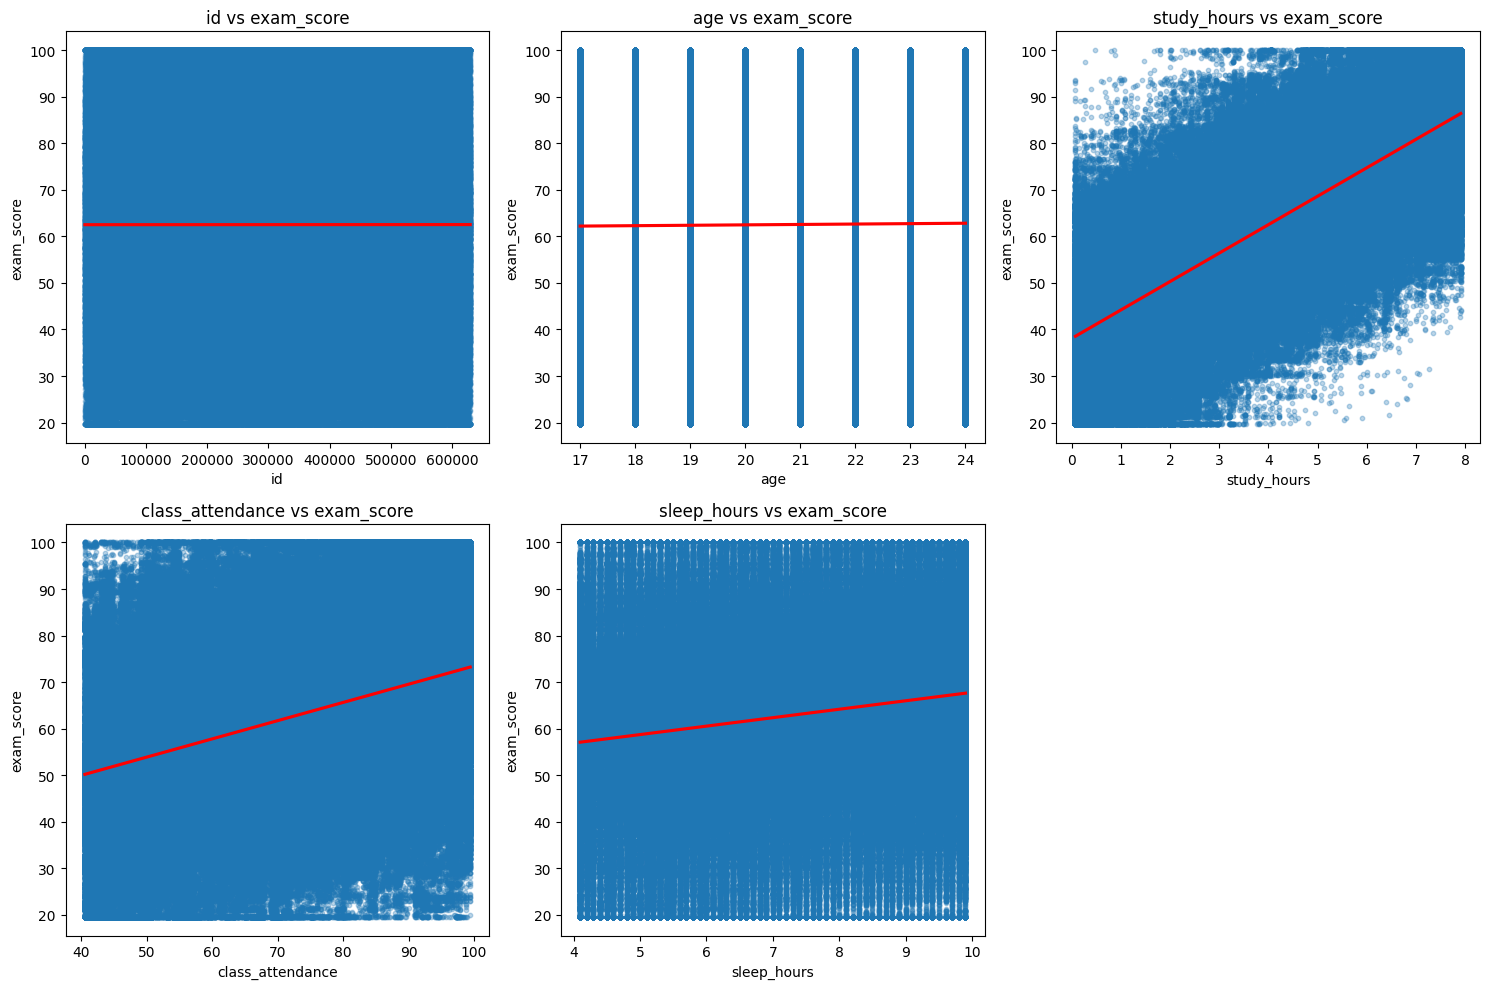

In [9]:
# ==========================================
# 6.1. Numerical Features vs Target Analysis
# ==========================================
print("\n--- 5. Numerical Features vs Target (Scatter Plot) ---")

target_col = 'exam_score' 

# Select features excluding the target itself
features = [col for col in num_cols if col != target_col]

if len(features) > 0 and target_col in df_train.columns:
    n_cols = 3
    n_rows = (len(features) - 1) // n_cols + 1
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(features):
        plt.subplot(n_rows, n_cols, i+1)
        
        # Regression Plot
        sns.regplot(x=df_train[col], y=df_train[target_col], 
                    scatter_kws={'alpha':0.3, 's':10}, 
                    line_kws={'color':'red'})
        
        plt.title(f'{col} vs {target_col}')
        
    plt.tight_layout()
    plt.show()


--- 6. Categorical Features vs Target (Box Plot) ---


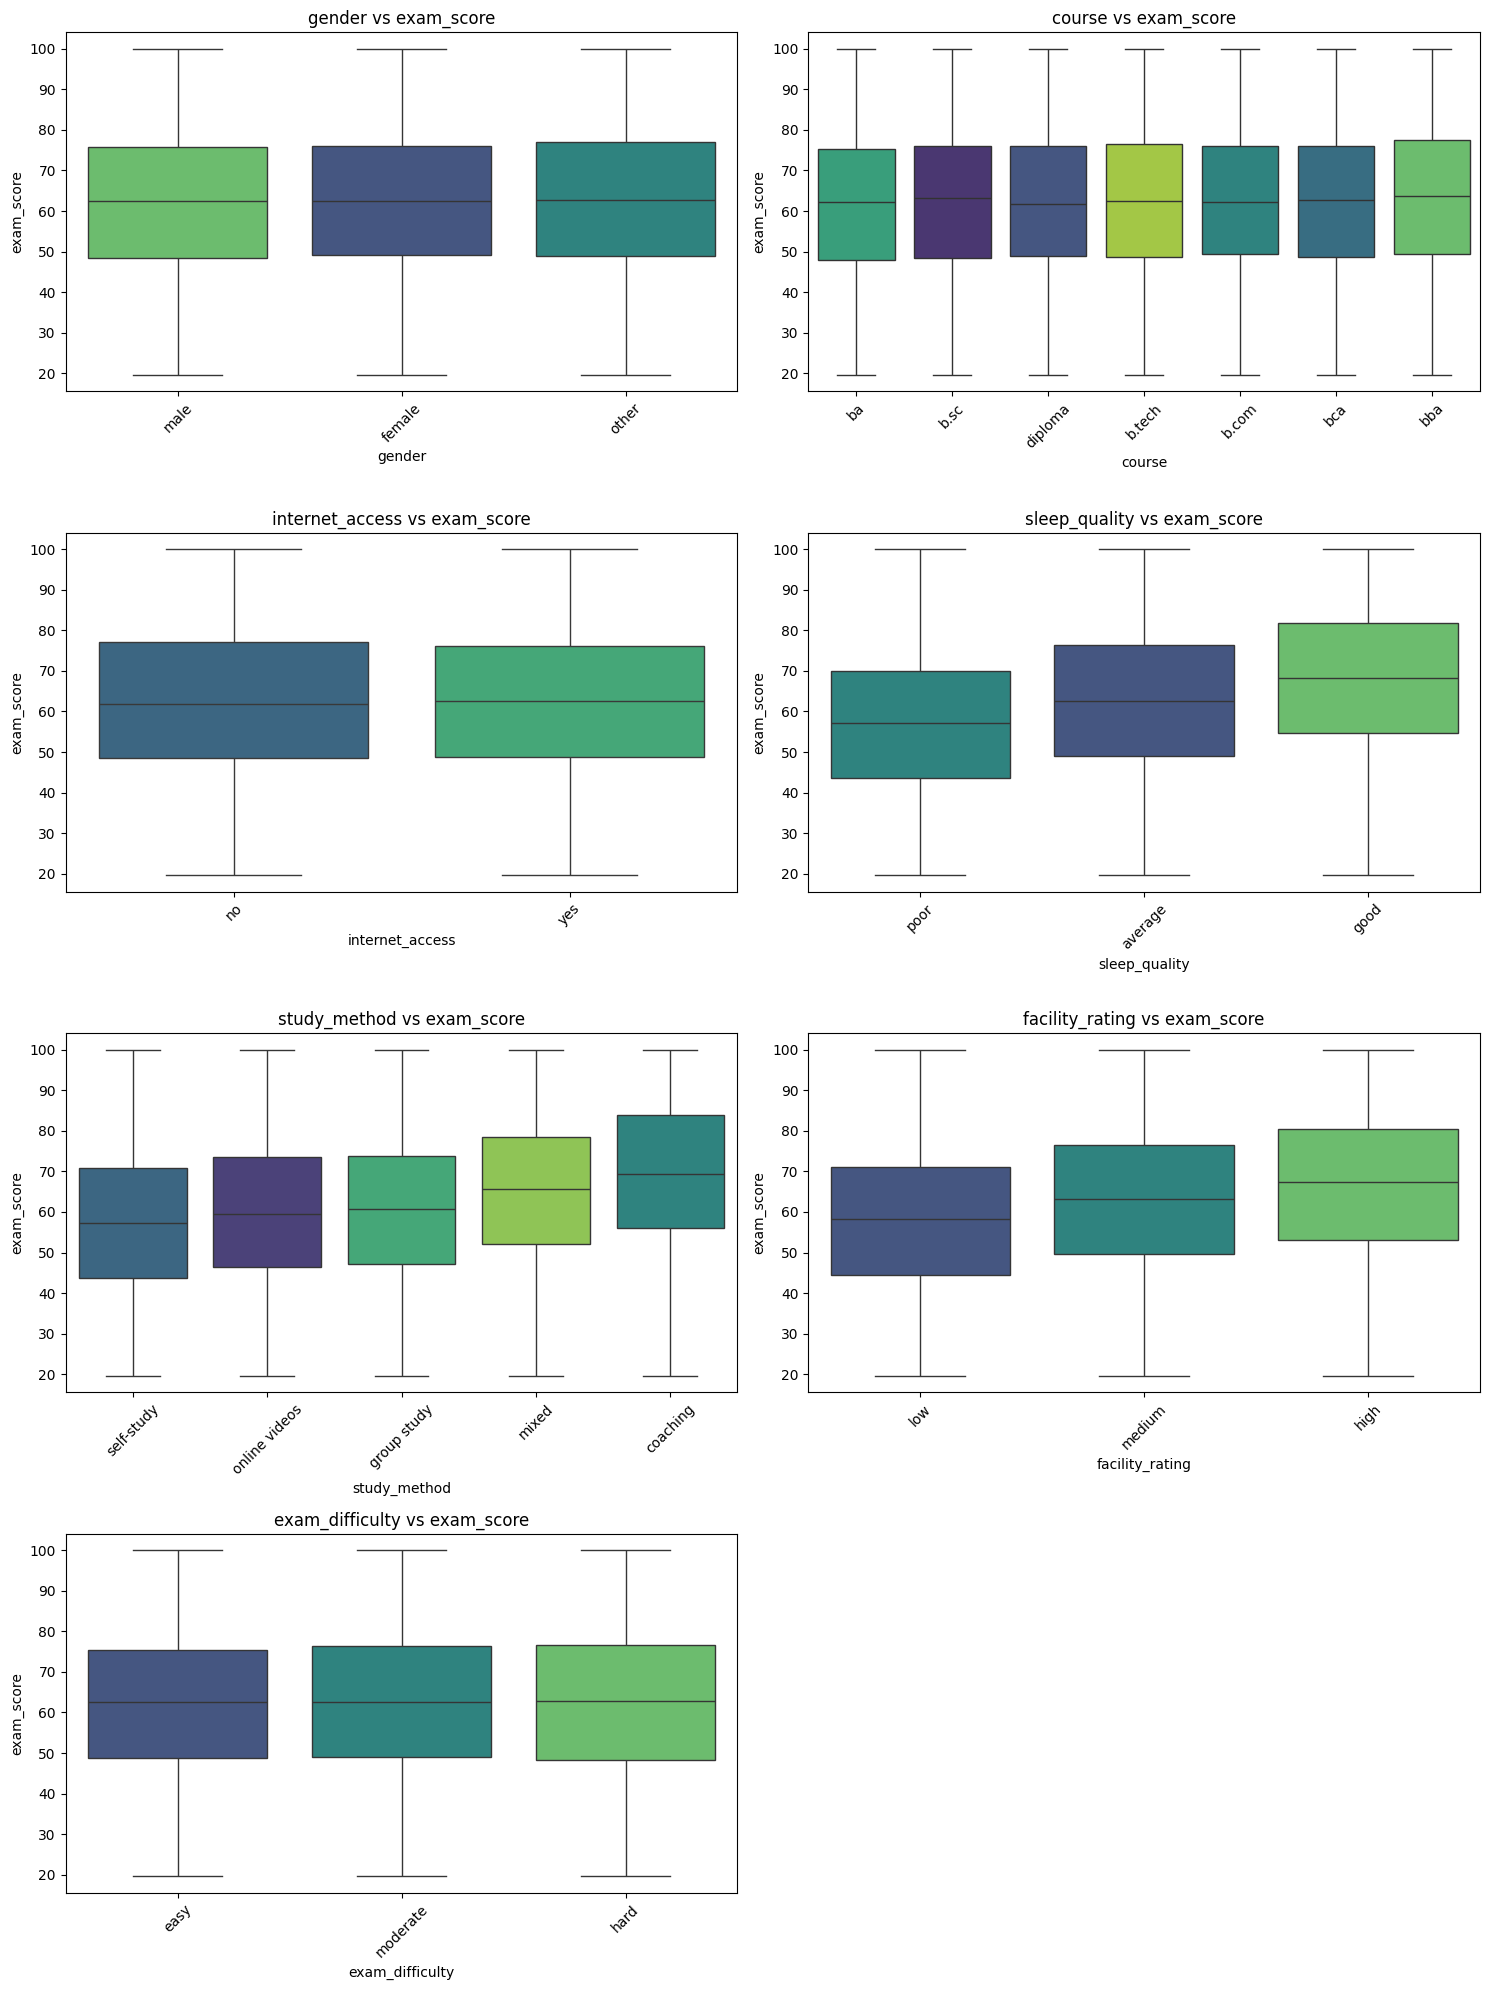

In [10]:
# ==========================================
# 6.2. Categorical Features vs Target Analysis
# ==========================================
print("\n--- 6. Categorical Features vs Target (Box Plot) ---")

if len(cat_cols) > 0 and target_col in df_train.columns:
    # Filter columns with low cardinality
    valid_cat_cols = [col for col in cat_cols if df_train[col].nunique() < 20]
    
    if len(valid_cat_cols) > 0:
        n_cols = 2
        n_rows = (len(valid_cat_cols) - 1) // n_cols + 1
        
        plt.figure(figsize=(15, 5 * n_rows))
        
        for i, col in enumerate(valid_cat_cols):
            plt.subplot(n_rows, n_cols, i+1)
            
            # Sort order by mean target value
            order = df_train.groupby(col)[target_col].mean().sort_values().index
            
            sns.boxplot(
                x=col, 
                y=target_col, 
                hue=col,            
                data=df_train, 
                order=order, 
                palette='viridis', 
                legend=False        
            )
            plt.title(f'{col} vs {target_col}')
            plt.xticks(rotation=45)
            
        plt.tight_layout()
        plt.show()

## 7. Train vs Test


--- 7. Train vs Test Feature Distribution ---


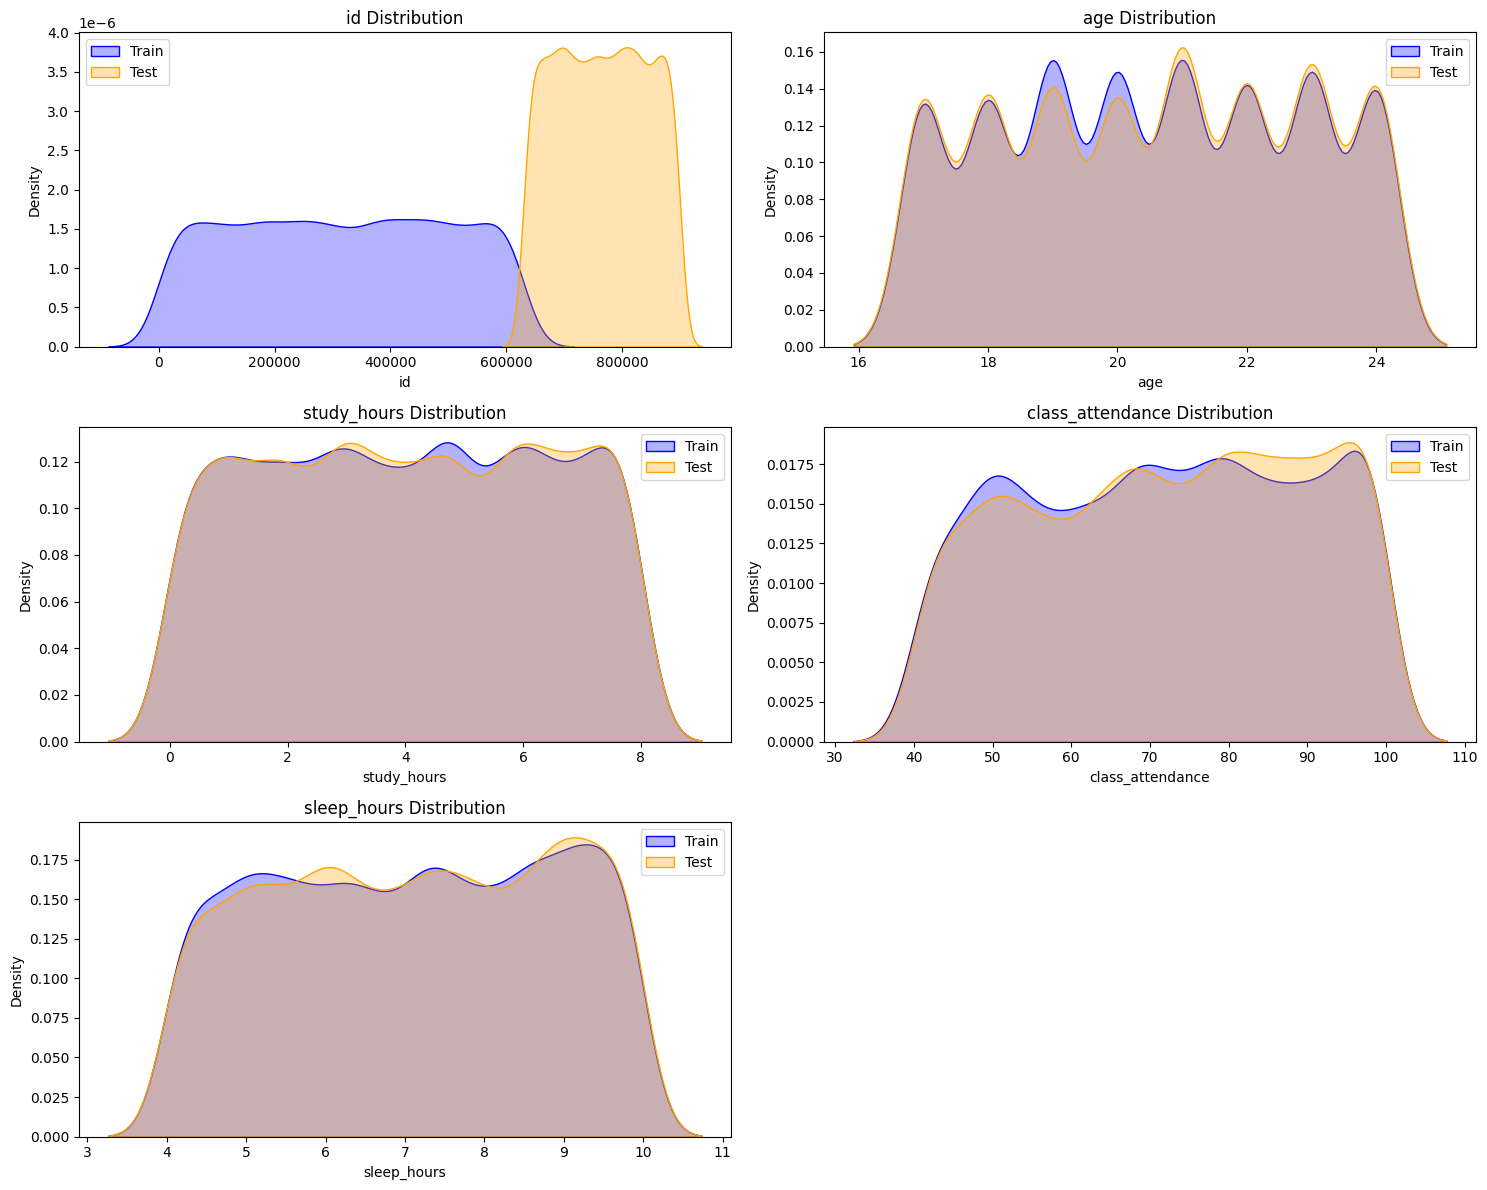

In [11]:
# =======================================
# 7. Train vs Test Numerical Distribution
# =======================================
print("\n--- 7. Train vs Test Feature Distribution ---")

# Compare numerical columns
common_cols = [col for col in num_cols if col in df_test.columns]

# 시각화할 최대 샘플 수 설정 (예: 10,000개)
# 데이터가 너무 많으면 KDE 계산이 멈추므로 제한을 둡니다.
SAMPLE_SIZE = 10000 

if len(common_cols) > 0:
    n_cols = 2
    n_rows = (len(common_cols) - 1) // n_cols + 1
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(common_cols):
        plt.subplot(n_rows, n_cols, i+1)
        
        # Train 데이터 샘플링 및 NaN 제거
        train_data = df_train[col].dropna()
        if len(train_data) > SAMPLE_SIZE:
            train_data = train_data.sample(n=SAMPLE_SIZE, random_state=42)
            
        # Test 데이터 샘플링 및 NaN 제거
        test_data = df_test[col].dropna()
        if len(test_data) > SAMPLE_SIZE:
            test_data = test_data.sample(n=SAMPLE_SIZE, random_state=42)

        # KDE Plot (warn_singular=False는 데이터가 모두 같은 값일 때 경고 무시)
        try:
            sns.kdeplot(train_data, label='Train', fill=True, alpha=0.3, color='blue', warn_singular=False)
            sns.kdeplot(test_data, label='Test', fill=True, alpha=0.3, color='orange', warn_singular=False)
        except Exception as e:
            # 특정 컬럼에서 에러 발생 시(예: 분산이 0인 경우) 텍스트로 표시하고 넘어감
            plt.text(0.5, 0.5, f'Error plotting {col}\n(Low Variance?)', 
                     horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            print(f"Skipping {col} due to error: {e}")
        
        plt.title(f'{col} Distribution')
        plt.legend()
        
    plt.tight_layout()
    plt.show()
else:
    print("No common numerical columns found.")


--- 7.2 Train vs Test Categorical Feature Distribution ---


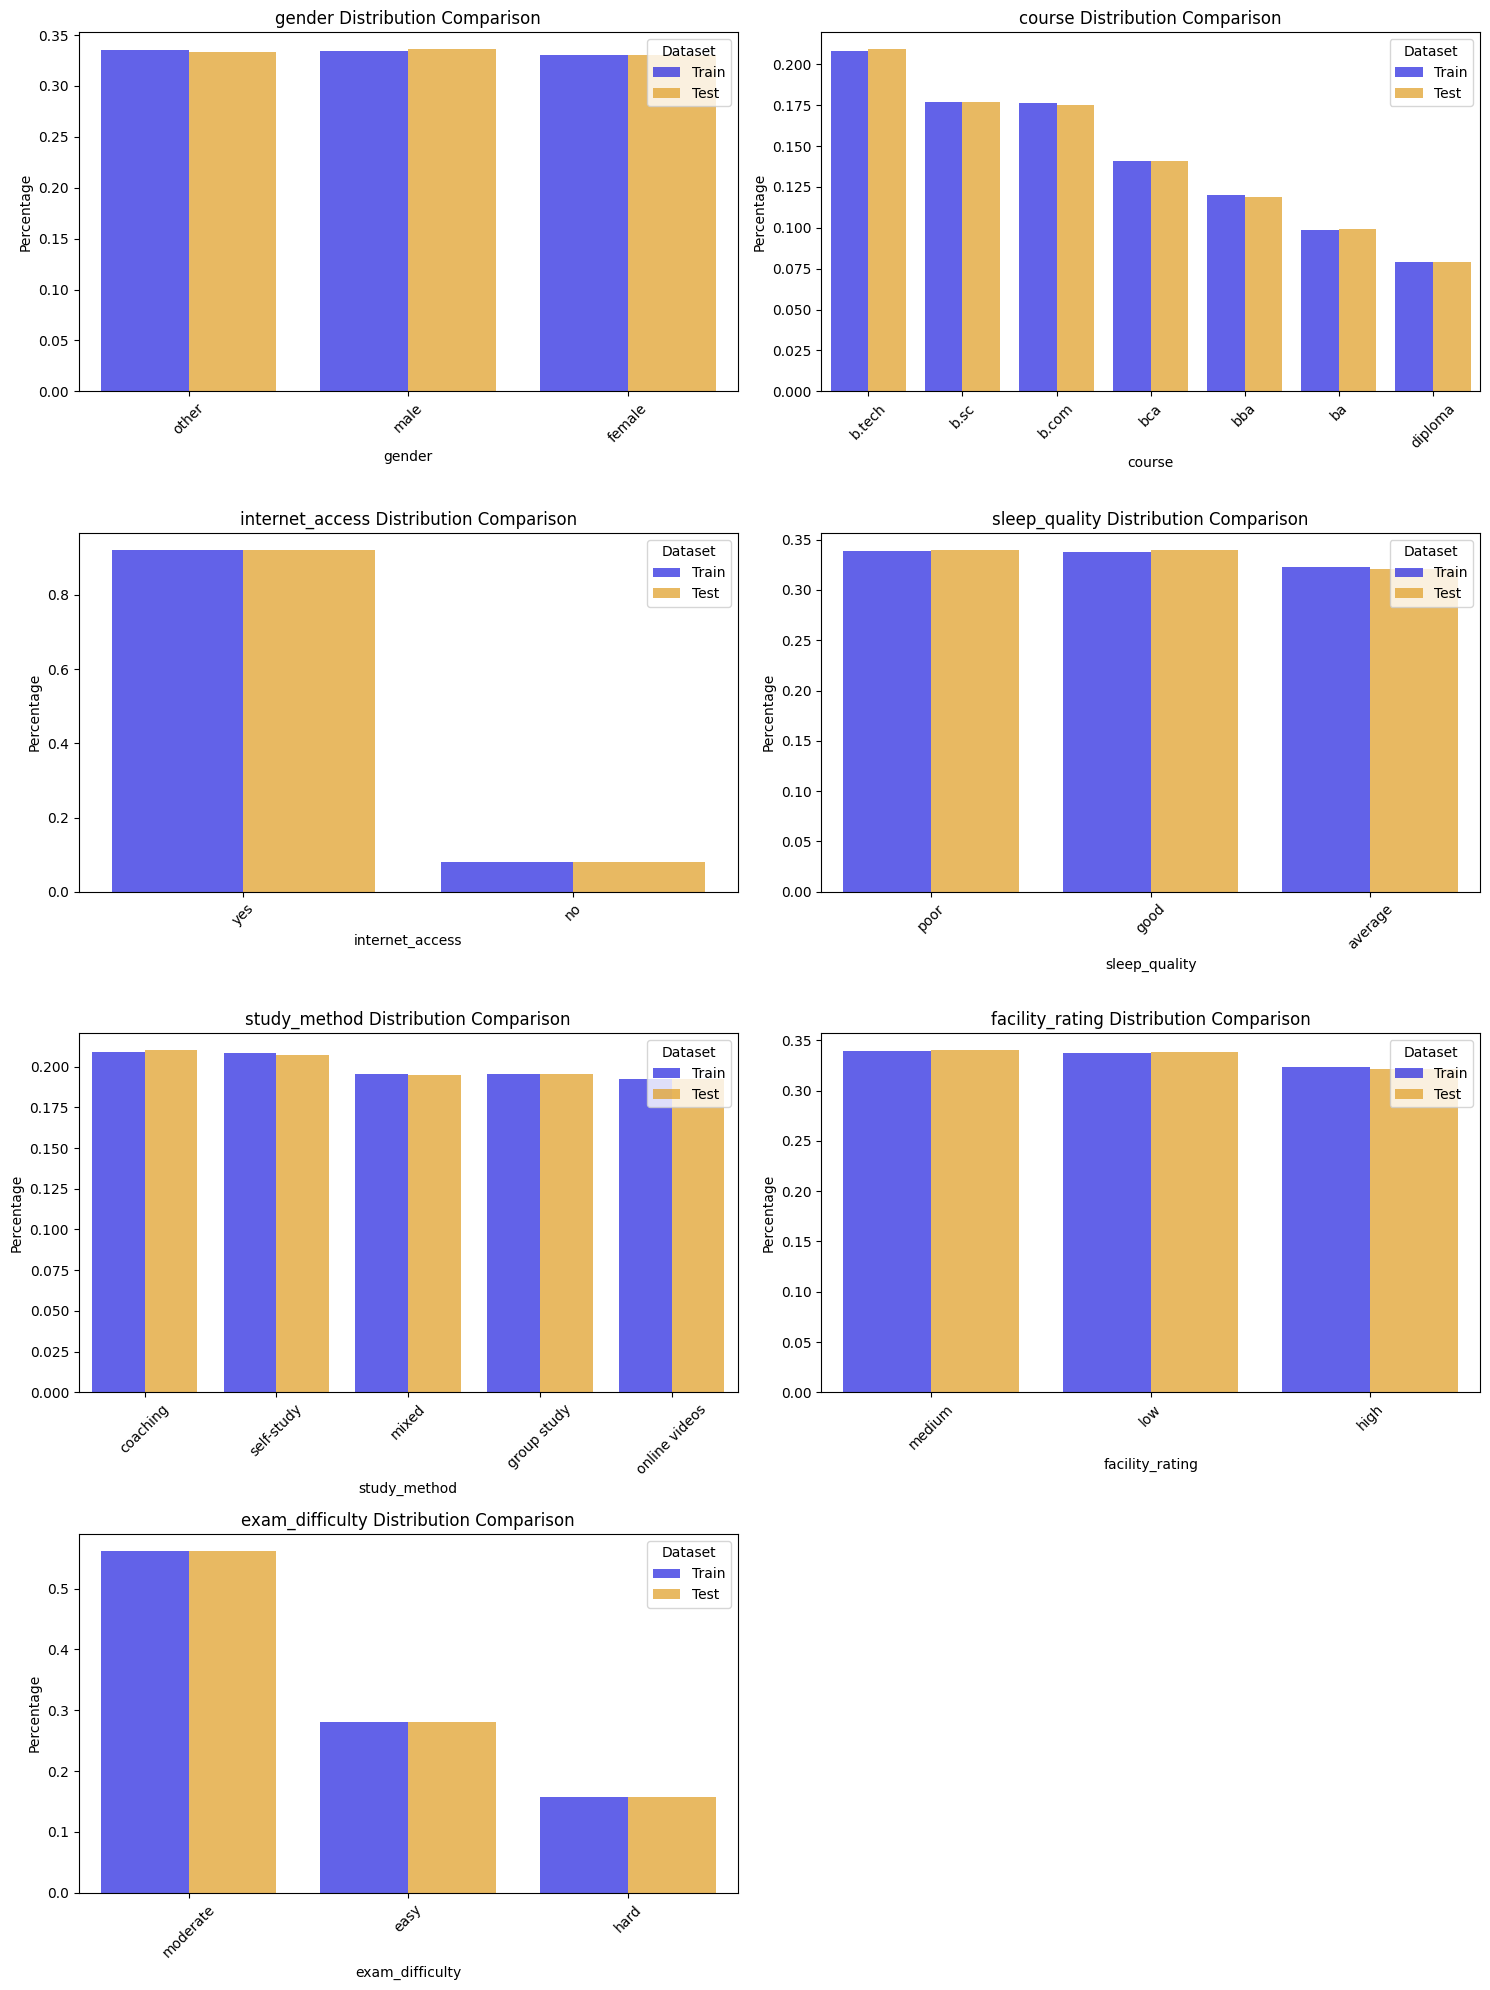

In [12]:
# ==========================================
# 7.2 Train vs Test Categorical Distribution
# ==========================================
print("\n--- 7.2 Train vs Test Categorical Feature Distribution ---")

# 1. Identify common categorical columns
common_cat_cols = [col for col in cat_cols if col in df_test.columns]

# 2. Filter low cardinality columns (< 20 unique values) for readability
plot_cat_cols = [col for col in common_cat_cols if df_train[col].nunique() < 20]

if len(plot_cat_cols) > 0:
    n_cols = 2
    n_rows = (len(plot_cat_cols) - 1) // n_cols + 1
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(plot_cat_cols):
        plt.subplot(n_rows, n_cols, i+1)
        
        # 3. Calculate value counts as percentages (normalize=True)
        train_pct = df_train[col].value_counts(normalize=True).rename('Train')
        test_pct = df_test[col].value_counts(normalize=True).rename('Test')
        
        # Combine into a single DataFrame
        comp_df = pd.concat([train_pct, test_pct], axis=1).fillna(0)
        
        # 🔥 FIX: Reset index and Rename columns explicitly to avoid KeyError
        comp_df = comp_df.reset_index()
        comp_df.columns = ['Category', 'Train', 'Test'] # Force rename columns
        
        # Melt for Seaborn compatibility
        comp_df_melted = comp_df.melt(id_vars='Category', var_name='Dataset', value_name='Percentage')
        
        # 4. Plot Grouped Bar Chart
        sns.barplot(
            data=comp_df_melted, 
            x='Category',      # Changed from 'index' to 'Category'
            y='Percentage', 
            hue='Dataset', 
            palette={'Train': 'blue', 'Test': 'orange'},
            alpha=0.7
        )
        
        plt.title(f'{col} Distribution Comparison')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No suitable categorical columns found for comparison.")

# Preprocessing

# Modeling

# Prediction